In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
csv_path = Path(r"C:\Users\user\Desktop\div\data\files\housing.csv")
df = pd.read_csv(csv_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()    

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


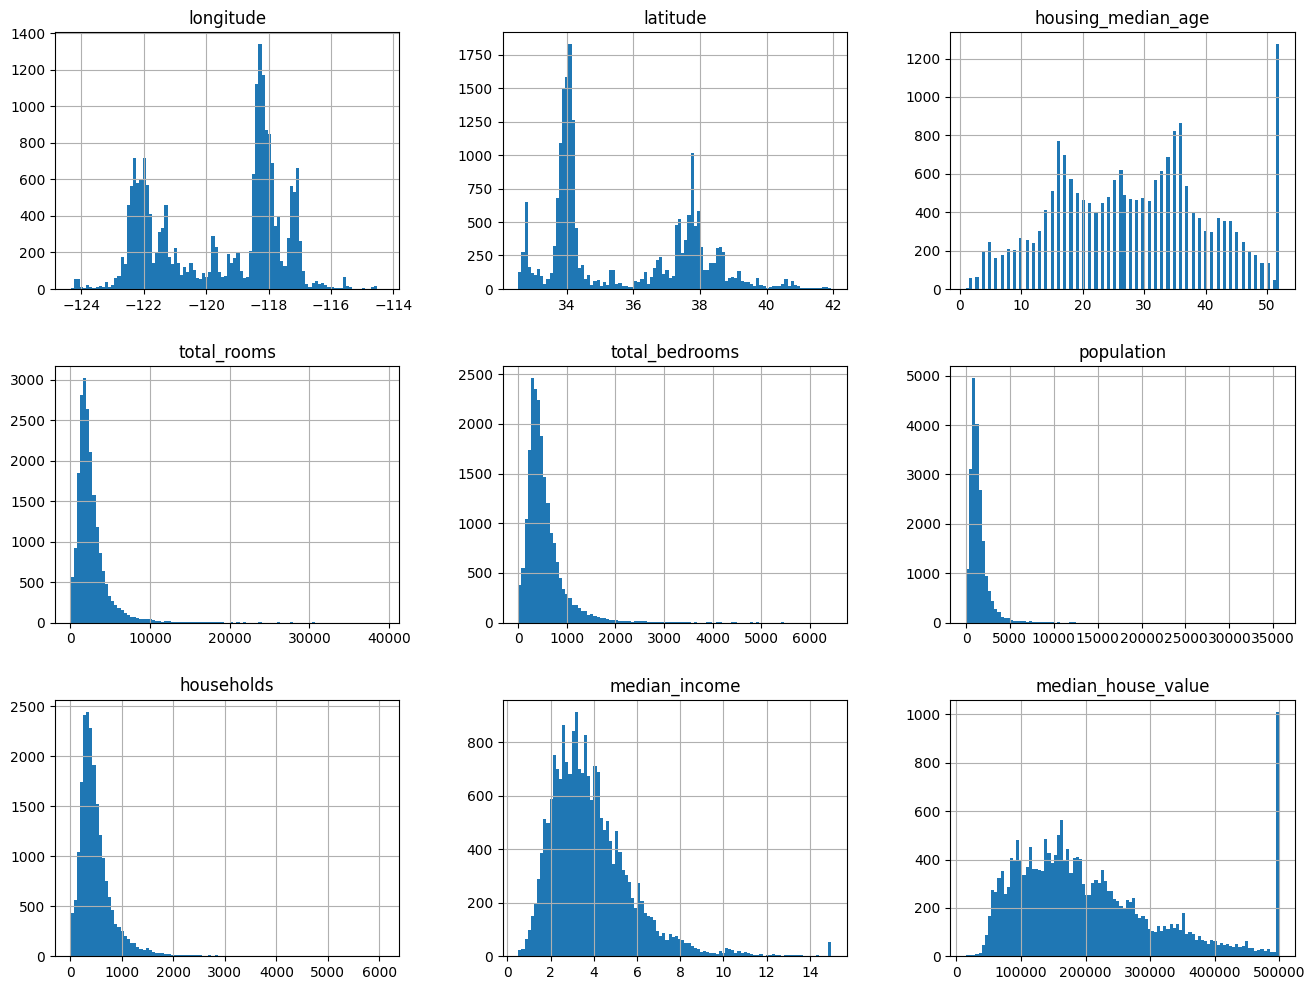

In [7]:
df.hist(bins=100, figsize=(16,12))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2)
train_set.shape, test_set.shape, 

((16512, 10), (4128, 10))

In [9]:
df['income_cat'] = pd.cut(
	df['median_income'], 
    bins=[0, 1.5, 3, 4.5, 6, np.inf], 
    labels=[1,2,3,4,5],
	)

df[['income_cat', 'median_income']].head()

,income_cat,median_income
0,5,8.3252
1,5,8.3014
2,5,7.2574
3,4,5.6431
4,3,3.8462


<Axes: xlabel='income_cat'>

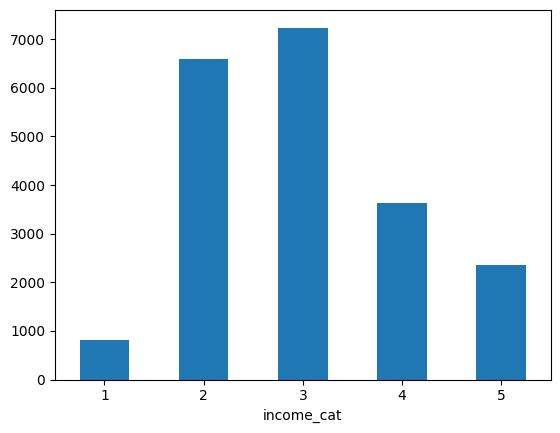

In [10]:
ic = df['income_cat'].value_counts().sort_index()
ic.plot.bar(rot=0)

In [11]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(
    df, 
    test_size=0.2
    )
strat_train_set, strat_test_set = train_test_split(
    df, 
    test_size=0.2, 
	stratify=df['income_cat']
    )

<Axes: xlabel='income_cat'>

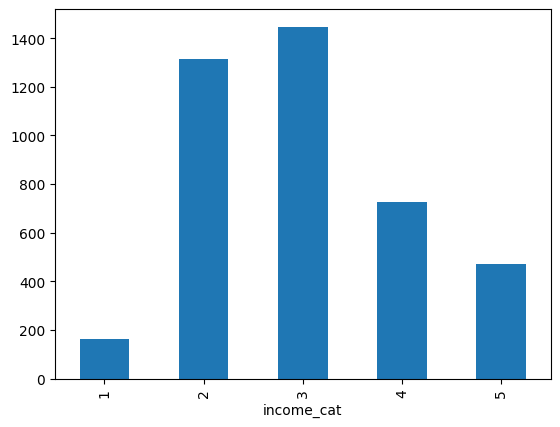

In [12]:
(
	strat_test_set['income_cat']
    .value_counts()
    .sort_index()
    .plot.bar()
)

In [13]:
# %pip install plotly nbformat

In [14]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [ ]:
# import plotly.express as px

# fig = px.scatter_map(
#     df, 
# 	'latitude', 
#     'longitude', 
#     color='median_house_value',
#     color_continuous_scale='jet',
#     size='population',
#     size_max=15,
# 	zoom=4,
#     opacity=0.5,
#     )
# fig.update_layout(margin={
# 		'l':0, 
# 		'r':0, 
# 		't':0, 
# 		'b':0, 
# 	},
# 	width=800
# )

In [16]:
mhv_mean = df['median_house_value'].mean()
l_mean = df['latitude'].mean()

nominator = (
(df['median_house_value'] - mhv_mean) 
* 
(df['latitude'] - l_mean)
).sum()

X = ((df['median_house_value'] - mhv_mean)**2).sum()
Y = ((df['latitude'] - l_mean)**2).sum()
denominator = (
    np.sqrt(X * Y)
)
nominator / denominator

np.float64(-0.14416027687465927)

In [17]:
# df.select_dtypes(include='number')
corr_matrix = df.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [18]:
# import plotly.express as px

# fig = px.imshow(
#     corr_matrix, 
#     color_continuous_scale='RdBu', 
#     text_auto=".2f",
# 	aspect='auto'
# )
# fig.update_layout(margin={
# 		't':0, 
# 		'b':0, 
# 	},
# 	width=400
# )  

In [19]:
# import matplotlib.pyplot as plt
# plt.scatter(
#     df['median_house_value'], 
#     df['median_income'], 
# )

In [20]:
# from pandas.plotting import scatter_matrix

# cols = [
#     'median_house_value', 'median_income', 
# 	'housing_median_age', 'total_rooms'
# ]

# scatter_matrix(
# 	df[cols], figsize=(16,16)
# )
# plt.show()

In [21]:
# px.scatter(
#     df, 
#     'median_house_value', 
#     'median_income', 
#     template='plotly_white', 
#     opacity=0.6, 
#     marginal_x='box',
#     marginal_y='box',
# )

In [22]:
df['bedroom_pct'] = (df['total_bedrooms'] / df['total_rooms'])
df.corr(numeric_only=True)['median_house_value'].sort_values()

bedroom_pct          -0.255880
latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [23]:
df['total_bedrooms'].mean(skipna=False)

np.float64(nan)

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,bedroom_pct
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0.172096


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
 11  bedroom_pct         20433 non-null  float64 
dtypes: category(1), float64(10), object(1)
memory usage: 1.8+ MB


In [26]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_pct
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.213039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.203162
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


In [27]:
# ort = df['total_bedrooms'].median()
# df['total_bedrooms'].fillna(ort)

ort = df.select_dtypes(include='number').median()
df.fillna(ort)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,bedroom_pct
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,0.219892


In [28]:
df.dropna(axis=0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,bedroom_pct
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,0.219892


In [31]:
df = strat_train_set.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16076,-120.99,37.66,39.0,1748.0,329.0,831.0,302.0,2.5938,135600.0,INLAND,2
16148,-121.13,38.66,2.0,12360.0,1747.0,4438.0,1470.0,6.2503,222500.0,INLAND,5
10121,-121.59,38.69,32.0,541.0,82.0,229.0,98.0,8.0379,383300.0,INLAND,5
14625,-117.44,34.10,43.0,1614.0,400.0,926.0,349.0,2.0750,95100.0,INLAND,2
9020,-118.15,34.10,39.0,3856.0,867.0,1847.0,830.0,3.4559,364900.0,<1H OCEAN,3


In [33]:
class Heyvan:
	nefes_alir = True

	def __init__(self, ad):
		self.ad = ad

h1 = Heyvan('qezenfer')
h1.ad

'qezenfer'

In [37]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(include = 'object')

In [69]:
null_mask = df_num.sort_index().isna().any(axis=1)
df_num.loc[null_mask].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9976,-117.15,32.72,51.0,1321.0,NaN,781.0,499.0,1.3071,250000.0
14903,-116.95,32.84,31.0,1307.0,NaN,752.0,231.0,3.4286,129400.0
15926,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,96700.0
15717,-117.91,33.87,29.0,1121.0,NaN,762.0,276.0,2.5000,143800.0
17796,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0


In [72]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(df_num)
# imp.statistics_
X = imp.transform(df_num)
df_num_tr = pd.DataFrame(X, columns=imp.get_feature_names_out())
# df_num_tr.loc[null_mask]

In [ ]:
from sklearn.impute import KNNImputer
kimp = KNNImputer(n_neighbors=10)
kimp.fit(df_num)
X = kimp.transform(df_num)


array([[-1.2099e+02,  3.7660e+01,  3.9000e+01, ...,  3.0200e+02,
         2.5938e+00,  1.3560e+05],
       [-1.2113e+02,  3.8660e+01,  2.0000e+00, ...,  1.4700e+03,
         6.2503e+00,  2.2250e+05],
       [-1.2159e+02,  3.8690e+01,  3.2000e+01, ...,  9.8000e+01,
         8.0379e+00,  3.8330e+05],
       ...,
       [-1.1842e+02,  3.4160e+01,  2.8000e+01, ...,  9.6100e+02,
         3.9028e+00,  3.6790e+05],
       [-1.1788e+02,  3.3740e+01,  1.6000e+01, ...,  4.4100e+02,
         3.1691e+00,  1.5940e+05],
       [-1.1791e+02,  3.3650e+01,  1.4000e+01, ...,  7.0300e+02,
         4.0417e+00,  1.8090e+05]])

In [81]:
m = df['median_income'].mean()
s = df['median_income'].std()
m - 3*s, m + 3*s
outlier1 = df['median_income'] > m + 3*s
outlier2 = df['median_income'] < m - 3*s
df.loc[outlier1 | outlier2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5872,-118.48,34.14,31.0,9320.0,1143.0,2980.0,1109.0,10.3599,500001.0,<1H OCEAN,5
15689,-118.10,34.12,50.0,1835.0,231.0,636.0,211.0,11.6471,500001.0,<1H OCEAN,5
1049,-118.24,34.16,52.0,2187.0,284.0,733.0,274.0,9.5823,406200.0,<1H OCEAN,5
1485,-122.36,37.54,23.0,6184.0,747.0,2165.0,700.0,10.1675,500001.0,NEAR OCEAN,5
20119,-118.29,34.11,49.0,2850.0,379.0,1113.0,380.0,12.9591,500001.0,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...,...
704,-122.56,37.94,36.0,2023.0,242.0,653.0,241.0,10.6272,500001.0,NEAR BAY,5
19113,-122.46,37.98,10.0,1325.0,189.0,427.0,162.0,12.0933,500001.0,NEAR BAY,5
5786,-122.20,37.46,40.0,1723.0,208.0,976.0,209.0,9.8892,500001.0,NEAR OCEAN,5
8215,-117.25,32.83,17.0,2075.0,262.0,704.0,241.0,10.9529,500001.0,NEAR OCEAN,5


In [90]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_num)
X = ss.transform(df_num)
df_num_ss = pd.DataFrame(X, columns=ss.get_feature_names_out())
o1 = (df_num_ss < -3 ).any(axis=1)
o2 = (df_num_ss > 3 ).any(axis=1)
df_num_ss.loc[o1 | o2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-0.781057,1.421129,-2.117539,4.429876,2.841676,2.613042,2.503492,1.270407,0.136090
8,0.542599,-0.698626,0.187551,3.043928,1.419840,1.346563,1.570004,3.458586,2.543411
13,-1.480348,1.088159,-0.527822,2.189564,3.387812,1.346563,3.584373,-0.149385,0.559430
38,-0.855981,1.027192,-1.481652,2.991499,2.905235,3.913398,3.028418,-0.114136,-0.758303
44,0.972163,-0.693936,-1.004737,4.975137,2.740453,3.682340,3.015489,1.410709,0.908165
...,...,...,...,...,...,...,...,...,...
16384,1.012123,-0.708005,-1.958568,6.808326,5.365200,5.503880,5.097090,0.675655,-0.216983
16396,-1.210621,0.900570,-1.004737,1.825297,3.667942,2.796326,3.623161,-0.509538,0.060617
16400,0.562579,-0.693936,1.220868,-0.394498,-0.679957,-0.685188,-0.648646,3.296187,2.543411
16463,1.072062,-0.703316,-1.958568,4.077462,2.957024,3.799606,3.111165,0.513256,-0.563115
